In [21]:
#For first timers, run the following lines
import nltk
#and then select the vader_lexicon package from the window

# OR use below
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zyu\AppData\Roaming\nltk_data...


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [74]:
news_tables = {}

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['amzn','goog','META']

for ticker in tickers:
    url = finviz_url + ticker + '&p=d'
    req = Request(url, headers={'user-agent':'my-app'})
    req = urlopen(req)
    soup = BeautifulSoup(req, 'html')
    news = soup.find(id='news-table')
    news_tables[ticker] = news

In [75]:
news

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" width="130">Dec-15-22 12:00PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.wsj.com/articles/why-companies-do-layoffs-around-christmas-11671120912?siteid=yhoof2" onclick="trackAndOpenNews(event, 'The Wall Street Journal', 'https://www.wsj.com/articles/why-companies-do-layoffs-around-christmas-11671120912?siteid=yhoof2');" target="_blank">Why Companies Do Layoffs Around Christmas</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> The Wall Street Journal</span></div></div></td></tr>
<tr><td align="right" width="130">10:30AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/putting-emissions-first-meta-leads-153000432.html" onclick="trackAndOpenNews(event, 'ACCE

In [76]:
parsed_data = []

for ticker, news in news_tables.items():
    for row in news.findAll('tr'):
        if row.a is not None:
            title = row.a.text
            date_data = row.td.text.split(' ')
            
            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])

In [77]:
#If need to view the data:    
#print(parsed_data)

In [78]:
#If need to check the data structure
#amzn_data = news_tables['amzn']
#amzn_rows = amzn_data.findAll('tr')
#for index, row in enumerate(amzn_rows):
#    if row.a is not None:
#        timestamp = row.td.text
#        title = row.a.text
#        print(timestamp + " " + title)
#        print('----')

In [79]:
df = pd.DataFrame(parsed_data, columns=['ticker','date','time','title'])
df

,ticker,date,time,title
0,amzn,Dec-15-22,11:38AM,Amazon Games and Crystal Dynamics Strike Deal ...
1,amzn,Dec-15-22,11:21AM,Amazon Is Quietly Becoming an Advertising Powe...
2,amzn,Dec-15-22,10:12AM,UPDATE 1-Amazon and Flipkart challenged in Ind...
3,amzn,Dec-15-22,10:07AM,3 Growth Stocks With More Potential Than Any C...
4,amzn,Dec-15-22,10:03AM,"Amazon, a trending stock in 2022, is down 46% ..."
...,...,...,...,...
295,META,Dec-06-22,10:39AM,Meta Stock Tumbles On Report EU Flagging Conce...
296,META,Dec-06-22,10:30AM,"Meta gives VIP users unfair advantage, oversig..."
297,META,Dec-06-22,10:16AM,Meta's Oversight Board Calls For Restructuring...
298,META,Dec-06-22,10:13AM,Metas Targeted Ad Model Faces Restrictions in ...


In [80]:
vader = SentimentIntensityAnalyzer()

#If need to try how this method works
#vader.polarity_scores('I am a nice person')

In [81]:
df['comp_score'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])
df

,ticker,date,time,title,comp_score
0,amzn,Dec-15-22,11:38AM,Amazon Games and Crystal Dynamics Strike Deal ...,0.3182
1,amzn,Dec-15-22,11:21AM,Amazon Is Quietly Becoming an Advertising Powe...,0.1779
2,amzn,Dec-15-22,10:12AM,UPDATE 1-Amazon and Flipkart challenged in Ind...,-0.1027
3,amzn,Dec-15-22,10:07AM,3 Growth Stocks With More Potential Than Any C...,0.3818
4,amzn,Dec-15-22,10:03AM,"Amazon, a trending stock in 2022, is down 46% ...",0.1779
...,...,...,...,...,...
295,META,Dec-06-22,10:39AM,Meta Stock Tumbles On Report EU Flagging Conce...,0.0000
296,META,Dec-06-22,10:30AM,"Meta gives VIP users unfair advantage, oversig...",0.4466
297,META,Dec-06-22,10:16AM,Meta's Oversight Board Calls For Restructuring...,0.3612
298,META,Dec-06-22,10:13AM,Metas Targeted Ad Model Faces Restrictions in ...,0.0000


In [82]:
df['date'] = pd.to_datetime(df.date).dt.date

In [83]:
plt.figure(figsize=(10, 8))
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df

comp_score
ticker date                  
META   2022-12-06   -0.010580
       2022-12-07    0.064156
       2022-12-08   -0.083000
       2022-12-09    0.087256
       2022-12-10    0.262220
       2022-12-11    0.227117
       2022-12-12    0.000125
       2022-12-13   -0.271389
       2022-12-14   -0.242994
       2022-12-15    0.028536
amzn   2022-12-10    0.356600
       2022-12-11    0.212191
       2022-12-12    0.091257
       2022-12-13    0.305959
       2022-12-14    0.160757
       2022-12-15    0.042360
goog   2022-12-08    0.012509
       2022-12-09    0.133128
       2022-12-10    0.244367
       2022-12-11    0.254675
       2022-12-12    0.064879
       2022-12-13    0.165344
       2022-12-14   -0.008864
       2022-12-15    0.033350

<Figure size 1000x800 with 0 Axes>

In [84]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('comp_score', axis="columns").transpose()
mean_df.to_csv('news.csv')

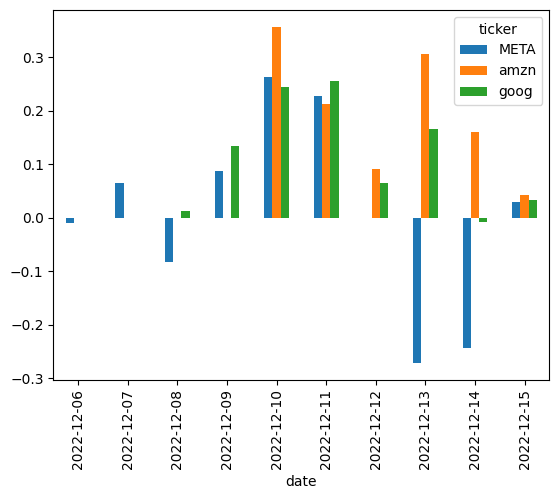

In [85]:
mean_df.plot(kind='bar')
plt.show()